/usr/local/lib/python3.10/dist-packages/timm/models/_factory.py:117: UserWarning: Mapping deprecated model name tf_efficientnet_b7_ns to current tf_efficientnet_b7.ns_jft_in1k.
  model = create_fn(


model.safetensors:   0%|          | 0.00/267M [00:00<?, ?B/s]

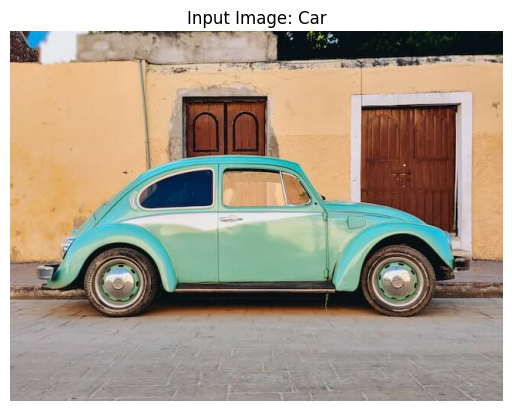

Predicted Class: cab, hack, taxi, taxicab


In [1]:
import torch
import timm
from torchvision import transforms
from PIL import Image
import requests
import matplotlib.pyplot as plt
import json

# Load Pretrained EfficientNet-B7 Model
model_name = "tf_efficientnet_b7_ns"
model = timm.create_model(model_name, pretrained=True, num_classes=1000)  # 1000 classes for ImageNet
model.eval()  # Set model to evaluation mode

# Load Image
image_url = "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/transformers/tasks/car.jpg"
image = Image.open(requests.get(image_url, stream=True).raw)

# Display the Image with Name
plt.imshow(image)
plt.axis("off")  # Hide axes
plt.title("Input Image: Car")
plt.show()

# Preprocessing (Resize, Normalize, Convert to Tensor)
transform = transforms.Compose([
    transforms.Resize((600, 600)),  # EfficientNet-B7 expects large inputs
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # ImageNet normalization
])

image_tensor = transform(image).unsqueeze(0)  # Add batch dimension

# Perform Inference
with torch.no_grad():
    outputs = model(image_tensor)

# Get Predicted Class Index
predicted_class_idx = outputs.argmax(-1).item()

# Load ImageNet Class Labels
labels_url = "https://storage.googleapis.com/bit_models/ilsvrc2012_wordnet_lemmas.txt"
labels = requests.get(labels_url).text.splitlines()

# Get Predicted Class Label
predicted_class_label = labels[predicted_class_idx]

print(f"Predicted Class: {predicted_class_label}")
